<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/complex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complex



In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split #novidade
from sklearn.metrics import mean_squared_error 


In [0]:
def standard(s):
    m=s.mean()
    d=s.std()
    s=(s-m)/d
    return s

Importação do DataSet com  Pandas

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/douglasbarbosadelima/Data-Science/master/cars-uci-linked.csv')
df=df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst
4,17.0,8,3020,140.0,3449,105,70,1,ford torino


Standardização da feature potência e criação de hps no dataframe

In [4]:
df['hps']=standard(df['horsepower'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hps
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu,0.663285
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320,1.572585
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite,1.182885
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst,1.182885
4,17.0,8,3020,140.0,3449,105,70,1,ford torino,0.923085


Montagem da Matriz X (como usaremos sklearn, não precisamos da coluna de 1´s)

In [0]:
X=np.zeros((len(df),1))
X[:,0]=df['hps']
y=df['mpg']

Criação do modelo de regressão linear

In [0]:
lr1=LinearRegression()

erro médio quadrático na amostra de treinamento

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,random_state=42)
lr1.fit(X_train,y_train)
ye=lr1.predict(X_train)
e_train=mean_squared_error(ye,y_train)
print('erro train :',e_train)

erro train : 23.929910691172378


erro médio quadrático na amostra de testes

In [8]:
yet=lr1.predict(X_test)
e_test=mean_squared_error(yet,y_test)
print('erro test :',e_test)

erro test : 24.556123551125147


Mostre a variação do erro (%) de treino para testes

In [12]:
100*(e_test-e_train)/e_train

2.6168625033096173

Faça agora com Regressão com potência + de quadrado à décima potência da potência, comece criando a matriz X

In [0]:
XP=np.zeros((len(df),4))
for i in range(4):
    XP[:,i]=df['hps']**(i+1)
y=df['mpg']
XP[:2]

lr2=LinearRegression()

Mostre os erros no dataset de Treinamento e de testes

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    XP, y, test_size=0.3,random_state=42)
lr2.fit(X_train,y_train)
ye=lr2.predict(X_train)
e_train=mean_squared_error(ye,y_train)
print('erro train :',e_train)

erro train : 18.486859117028587


In [100]:
yet=lr2.predict(X_test)
e_test=mean_squared_error(yet,y_test)
print('erro test :',e_test)

erro test : 20.654935237391108


Mostre a variação do erro (%) de treino para testes

In [101]:
100*(e_test-e_train)/e_train

11.72766074884763

Faça o Gráfico Pot X Consumo para os dois modelos para a a mostra toda, além da própria amostra

In [0]:
yp1=lr1.predict(X)
yp2=lr2.predict(XP)

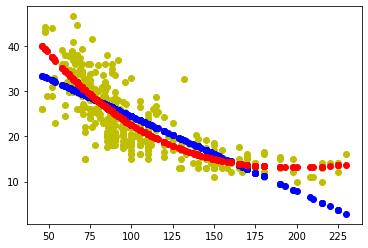

In [102]:
import matplotlib.pyplot as plt
plt.plot(df['horsepower'],df['mpg'],'yo')
plt.plot(df['horsepower'],yp1,'bo')
plt.plot(df['horsepower'],yp2,'ro')
plt.show()